In [52]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import  StringType
from pyspark.sql.types import  LongType
from pyspark.sql.types import IntegerType
from pyspark.sql.types import BooleanType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum
from pyspark.sql import Window
import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession \
    .builder \
    .appName("Wrangling Data") \
    .getOrCreate()

24/05/24 10:23:17 WARN Utils: Your hostname, zahra-laptop resolves to a loopback address: 127.0.1.1; using 192.168.178.28 instead (on interface wlo1)
24/05/24 10:23:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/24 10:23:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
path='./data/sparkify_log_small.json'
user_log =spark.read.json(path)

In [4]:
user_log.describe('artist').show()

+-------+-----------------+
|summary|           artist|
+-------+-----------------+
|  count|             8347|
|   mean|            461.0|
| stddev|            300.0|
|    min|              !!!|
|    max|ÃÂlafur Arnalds|
+-------+-----------------+


In [5]:
user_log.take(3)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

In [6]:
user_log.show(5)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [7]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)


In [8]:
user_log.describe().show()

24/05/24 10:23:22 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|summary|           artist|      auth|firstName|gender|     itemInSession|lastName|           length|level|    location|method|   page|        registration|         sessionId|    song|           status|                 ts|           userAgent|            userId|
+-------+-----------------+----------+---------+------+------------------+--------+-----------------+-----+------------+------+-------+--------------------+------------------+--------+-----------------+-------------------+--------------------+------------------+
|  count|             8347|     10000|     9664|  9664|             10000|    9664|             8347|10000|        9664| 10000|  10000|                9664|             10000|    8347|            10000|         

In [9]:
user_log.count()

10000

In [10]:
user_log.select(['artist','song']).where(user_log.userId=='1046').collect()

[Row(artist='Showaddywaddy', song='Christmas Tears Will Fall'),
 Row(artist='Darius Rucker', song='Be Wary Of A Woman'),
 Row(artist='Public Enemy', song='Public Enemy No.1'),
 Row(artist='Jag Panzer', song='Reign Of The Tyrants'),
 Row(artist='Boyzone', song='Father And Son'),
 Row(artist='Hollywood Undead', song='No. 5'),
 Row(artist='Jimmy Eat World', song='Seventeen'),
 Row(artist=None, song=None),
 Row(artist='Wilco', song='War on war'),
 Row(artist='Fountains Of Wayne', song='Killermont Street'),
 Row(artist='Miike Snow', song='Black & Blue'),
 Row(artist=None, song=None),
 Row(artist=None, song=None),
 Row(artist='Yeah Yeah Yeahs', song='Heads Will Roll'),
 Row(artist='Linkin Park', song='Bleed It Out [Live At Milton Keynes]'),
 Row(artist='Coldplay', song='Clocks'),
 Row(artist='Jill Scott', song='Love Rain'),
 Row(artist='Glassjaw', song="Ry Ry's Song (Album Version)"),
 Row(artist='Michael Cretu', song='The Invisible Man'),
 Row(artist='Lonnie Gordon', song='Catch You Baby (S

In [11]:
user_log.select('page').dropDuplicates().sort('page').collect()


[Row(page='About'),
 Row(page='Downgrade'),
 Row(page='Error'),
 Row(page='Help'),
 Row(page='Home'),
 Row(page='Login'),
 Row(page='Logout'),
 Row(page='NextSong'),
 Row(page='Save Settings'),
 Row(page='Settings'),
 Row(page='Submit Downgrade'),
 Row(page='Submit Upgrade'),
 Row(page='Upgrade')]

In [12]:
user_log.select('page').dropDuplicates().sort('page').show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+


In [13]:
def get_hour(x):
    return datetime.datetime.fromtimestamp(x / 1000.0).hour
udf_get_hour = udf(get_hour, IntegerType())

In [14]:
user_log=user_log.withColumn('hour',udf_get_hour(user_log.ts))

In [15]:
user_log.select(['artist','song']).where(user_log.hour==10).collect()

[Row(artist='Justin Timberlake', song='Rock Your Body'),
 Row(artist='Maria Bamford', song="Mom's Religion"),
 Row(artist='Basement Jaxx', song='Bingo Bango'),
 Row(artist='The Zutons', song='Confusion'),
 Row(artist='Clay Walker', song="What's It To You (Album Version)"),
 Row(artist='The Kinks', song='Animal Farm'),
 Row(artist='Warlocks', song='Nobody Knows'),
 Row(artist='Devo', song='Girl U Want (Live)'),
 Row(artist='Blind Melon', song='Paper Scratcher'),
 Row(artist='Jason Mraz & Colbie Caillat', song='Lucky (Album Version)'),
 Row(artist='Colbie Caillat', song="I Won't"),
 Row(artist='Groove Armada', song="I Won't Kneel"),
 Row(artist='Loudness', song="DOWN 'N' DIRTY"),
 Row(artist='Colbie Caillat', song='I Never Told You'),
 Row(artist='Frou Frou', song='Hear Me Out'),
 Row(artist='Vanilla Ice', song='Ice Ice Baby (Radio Edit)'),
 Row(artist='Black Eyed Peas', song='Imma Be'),
 Row(artist='Extreme', song='More Than Words'),
 Row(artist='The Archies', song='Sugar Sugar'),
 Row(

In [16]:
# get_hour =udf(lambda x: datetime.datetime.fromtimestamp(x / 1000.0).hour)
# user_log.withColumn('hour',get_hour(user_log.ts))

In [17]:
user_log.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour=23)

In [18]:
song_in_hour = user_log.select('hour').where(user_log.page=='NextSong').groupby(user_log.hour).count().sort(user_log.hour)
song_in_hour.show()

+----+-----+
|hour|count|
+----+-----+
|   0|  375|
|   1|  456|
|   2|  454|
|   3|  382|
|   4|  302|
|   5|  352|
|   6|  276|
|   7|  348|
|   8|  358|
|   9|  375|
|  10|  249|
|  11|  216|
|  12|  228|
|  13|  251|
|  14|  339|
|  15|  462|
|  16|  479|
|  17|  484|
|  18|  430|
|  19|  362|
+----+-----+


([<matplotlib.axis.XTick at 0x7434ef740670>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

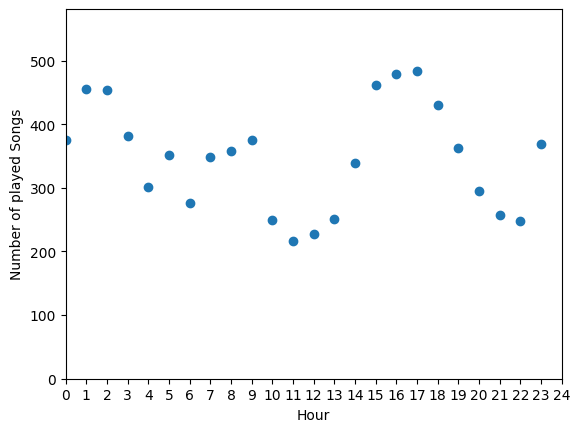

In [19]:
song_in_hour_pd = song_in_hour.toPandas()
plt.scatter(x=song_in_hour_pd['hour'],y= song_in_hour_pd['count'])
plt.xlim(0,24)
plt.ylim(0, 1.2*max(song_in_hour_pd['count']))
plt.xlabel('Hour')
plt.ylabel('Number of played Songs')
plt.xticks(range(0, 25))

In [20]:
user_log_valid= user_log.dropna(how='any',subset=['userId','sessionId'])

In [21]:
user_log_valid.count()

10000

In [22]:
user_log_valid.select('userId').dropDuplicates(['userId']).sort('userId').show()

+------+
|userId|
+------+
|      |
|    10|
|   100|
|  1000|
|  1003|
|  1005|
|  1006|
|  1017|
|  1019|
|  1020|
|  1022|
|  1025|
|  1030|
|  1035|
|  1037|
|   104|
|  1040|
|  1042|
|  1043|
|  1046|
+------+


In [23]:
user_log_valid=user_log_valid.filter(user_log_valid.userId !="")
user_log_valid.count()

9664

In [24]:
user_log_valid.filter('page=="Submit Downgrade"').show()

+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|artist|     auth|firstName|gender|itemInSession|lastName|length|level|            location|method|            page| registration|sessionId|song|status|           ts|           userAgent|userId|hour|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+
|  NULL|Logged In|    Kelly|     F|           24|  Newton|  NULL| paid|Houston-The Woodl...|   PUT|Submit Downgrade|1513283366284|     5931|NULL|   307|1513768454284|Mozilla/5.0 (Wind...|  1138|  12|
+------+---------+---------+------+-------------+--------+------+-----+--------------------+------+----------------+-------------+---------+----+------+-------------+--------------------+------+----+


In [25]:
user_log_valid.filter('ts<"1513768454284"' ).filter('userId=="1138"').sort('ts').show()

+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|              artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|                NULL|Logged In|    Kelly|     F|            2|  Newton|     NULL| paid|Houston-The Woodl...|   GET|    Home|1513283366284|     5566|                NULL|   200|1513729066284|Mozilla/5.0 (Wind...|  1138|   1|
|           Black Box|Logged In|    Kelly|     F|            3|  Newton|247.03955| paid|Houston-The 

In [26]:
user_log.select(['userId','firstName','page','level','song']).where('userId==1138').collect()

[Row(userId='1138', firstName='Kelly', page='Home', level='paid', song=None),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Everybody Everybody'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Gears'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Use Somebody'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Love Of My Life (1993 Digital Remaster)'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Down In The Valley Woe'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Treat Her Like A Lady'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song="Everybody Thinks You're An Angel"),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Fourteen Wives'),
 Row(userId='1138', firstName='Kelly', page='NextSong', level='paid', song='Love On The Rocks'),
 Row(userId='1138', f

In [27]:
flag_downgrade_event= udf(lambda x: 1 if x=='Downgrade' else 0, IntegerType() )
user_log_valid = user_log_valid.withColumn('Downgraded',flag_downgrade_event('page'))

In [28]:
user_log_valid.head()

Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046', hour=23, Downgraded=0)

In [29]:
user_log_valid.where('userId==1138').sort(desc ('ts')).show()

+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+----------------+-------------+---------+--------------------+------+-------------+--------------------+------+----+----------+
|              artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|            page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|Downgraded|
+--------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+----------------+-------------+---------+--------------------+------+-------------+--------------------+------+----+----------+
|FrÃÂ©meaux & Ass...|Logged In|    Kelly|     F|            0|  Newton| 28.96934| free|Houston-The Woodl...|   PUT|        NextSong|1513283366284|     7011|Grenouilles Manti...|   200|1513833144284|Mozilla/5.0 (Wind...|  1138|   6|         0|
|                NULL|Lo

In [30]:
windowval = Window.partitionBy('userId').orderBy(desc('ts')).rangeBetween(Window.unboundedPreceding,0)

In [31]:
user_log_valid = user_log_valid.withColumn('phase',Fsum('Downgraded').over(windowval))

In [32]:
user_log_valid.select('phase').show()

+-----+
|phase|
+-----+
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
|    0|
+-----+


In [33]:
user_log_valid.select(['userId','firstName','ts','page','level','phase']).where('userId==1138').collect()

[Row(userId='1138', firstName='Kelly', ts=1513833144284, page='NextSong', level='free', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513821430284, page='Home', level='free', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513814880284, page='NextSong', level='free', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513768456284, page='Home', level='free', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513768454284, page='Submit Downgrade', level='paid', phase=0),
 Row(userId='1138', firstName='Kelly', ts=1513768453284, page='Downgrade', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513768452284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513768242284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513768012284, page='NextSong', level='paid', phase=1),
 Row(userId='1138', firstName='Kelly', ts=1513767643284, page='NextSong', level='paid', phase=1),
 Row(userId='1138',

In [34]:
user_log.select('page').where('userId==""').drop_duplicates().show()

+-----+
| page|
+-----+
| Home|
|About|
|Login|
| Help|
+-----+


In [35]:
user_log.dropDuplicates(['userId']).filter('gender=="F"').count()

462

In [36]:
user_log.select(['artist']).groupby(['artist']).count().sort(desc('count')).show()

+--------------------+-----+
|              artist|count|
+--------------------+-----+
|                NULL| 1653|
|            Coldplay|   83|
|       Kings Of Leon|   69|
|Florence + The Ma...|   52|
|            BjÃÂ¶rk|   46|
|       Dwight Yoakam|   45|
|       Justin Bieber|   43|
|      The Black Keys|   40|
|         OneRepublic|   37|
|        Jack Johnson|   36|
|                Muse|   36|
|           Radiohead|   31|
|        Taylor Swift|   29|
|          Lily Allen|   28|
|Barry Tuckwell/Ac...|   28|
|               Train|   28|
|           Daft Punk|   27|
|          Nickelback|   27|
|           Metallica|   27|
|          Kanye West|   26|
+--------------------+-----+


In [56]:

home_have = udf(lambda x: 1 if x=="Home" else 0,IntegerType())
user_log_valid = user_log_valid.withColumn('home',home_have('page'))
user_log_valid.show(5)

+---------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+-------+------+-------------+--------------------+------+----+----------+-----+----+---+----+
|         artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|   song|status|           ts|           userAgent|userId|hour|Downgraded|phase|home|num|next|
+---------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+-------+------+-------------+--------------------+------+----+----------+-----+----+---+----+
|The Get Up Kids|Logged In| Veronica|     F|            0| Buckley|178.59873| free|Detroit-Warren-De...|   PUT|NextSong|1512966806284|     6676|Overdue|   200|1513828388284|"Mozilla/5.0 (Mac...|    10|   4|         0|    0|   0|  0|NULL|
|    OneRepublic|Logged In| Veronica|     F|    

In [64]:
next_have = udf(lambda x: 1 if x=="NextSong" else 0, IntegerType())
user_log_valid = user_log_valid.withColumn('next',next_have('page'))
user_log_valid.show(10)

+---------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+----------+-----+----+---+----+---------+----+
|         artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|Downgraded|phase|home|num|next|home_next|nums|
+---------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+----------+-----+----+---+----+---------+----+
|The Get Up Kids|Logged In| Veronica|     F|            0| Buckley|178.59873| free|Detroit-Warren-De...|   PUT|NextSong|1512966806284|     6676|             Overdue|   200|1513828388284|"Mozilla/5.0 (Ma

In [59]:
home_next_fn= udf(lambda x,y : x+y, IntegerType())
user_log_valid= user_log_valid.withColumn("home_next",home_next_fn("home",'next'))
user_log_valid.show(5)

+---------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+-------+------+-------------+--------------------+------+----+----------+-----+----+---+----+---------+
|         artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|   song|status|           ts|           userAgent|userId|hour|Downgraded|phase|home|num|next|home_next|
+---------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+-------+------+-------------+--------------------+------+----+----------+-----+----+---+----+---------+
|The Get Up Kids|Logged In| Veronica|     F|            0| Buckley|178.59873| free|Detroit-Warren-De...|   PUT|NextSong|1512966806284|     6676|Overdue|   200|1513828388284|"Mozilla/5.0 (Mac...|    10|   4|         0|    0|   0|  0|   1|        1|
|    One

In [62]:
windowfun = Window.partitionBy('userId').orderBy(desc('ts')).rangeBetween(Window.unboundedPreceding,0)
user_log_valid=user_log_valid.withColumn('nums',Fsum("home_next").over(windowfun))
# user_log_valid.select(['num',]).agg({'num':'avg'}).show()

In [63]:
user_log_valid.select(['nums']).agg({'nums':'avg'}).show()

+------------------+
|         avg(nums)|
+------------------+
|30.732201986754966|
+------------------+


In [ ]:
user_log.select(['page','userId','song']).where('page=="Home"').groupby(['userId']).count().agg({'count':'avg'}).show()

In [ ]:
user_log.select('song','artist','userId','page').where('page=="Home"').show()

In [ ]:
between_home=user_log_valid.where('page!="Home"').where('song!="NULL"')

In [ ]:
between_home.groupBy(['userId']).count().agg({'count':'avg'}).show()